# K-均值聚类算法

### K-均值聚类支持函数

In [1]:
from numpy import *

def loadDataSet(filename):
	dataMat = []
	fr = open(filename)
	for line in fr.readlines():
		curLine = line.strip().split('\t')
		fltLine = list(map(float,curLine))
		dataMat.append(fltLine)
	return dataMat

def distEclud(vecA, vecB):
	return sqrt(sum(power(vecA - vecB , 2)))

def randCent(dataSet, k):
	n = shape(dataSet)[1]
	centroids = mat(zeros((k, n)))
	for j in range(n):
		minJ = min(dataSet[:,j])
		rangeJ = float(max(dataSet[:,j]) - minJ)
		centroids[:,j] = minJ + rangeJ * random.rand(k,1)
	return centroids

In [2]:
dataset = loadDataSet('E:\\python\\machinelearning\\MLDownloads\\machinelearninginaction\\Ch10\\testSet.txt')
dataMat = mat(dataset)
dataset

[[1.658985, 4.285136],
 [-3.453687, 3.424321],
 [4.838138, -1.151539],
 [-5.379713, -3.362104],
 [0.972564, 2.924086],
 [-3.567919, 1.531611],
 [0.450614, -3.302219],
 [-3.487105, -1.724432],
 [2.668759, 1.594842],
 [-3.156485, 3.191137],
 [3.165506, -3.999838],
 [-2.786837, -3.099354],
 [4.208187, 2.984927],
 [-2.123337, 2.943366],
 [0.704199, -0.479481],
 [-0.39237, -3.963704],
 [2.831667, 1.574018],
 [-0.790153, 3.343144],
 [2.943496, -3.357075],
 [-3.195883, -2.283926],
 [2.336445, 2.875106],
 [-1.786345, 2.554248],
 [2.190101, -1.90602],
 [-3.403367, -2.778288],
 [1.778124, 3.880832],
 [-1.688346, 2.230267],
 [2.592976, -2.054368],
 [-4.007257, -3.207066],
 [2.257734, 3.387564],
 [-2.679011, 0.785119],
 [0.939512, -4.023563],
 [-3.674424, -2.261084],
 [2.046259, 2.735279],
 [-3.18947, 1.780269],
 [4.372646, -0.822248],
 [-2.579316, -3.497576],
 [1.889034, 5.1904],
 [-0.798747, 2.185588],
 [2.83652, -2.658556],
 [-3.837877, -3.253815],
 [2.096701, 3.886007],
 [-2.709034, 2.923887],

In [3]:
dataMat

matrix([[ 1.658985,  4.285136],
        [-3.453687,  3.424321],
        [ 4.838138, -1.151539],
        [-5.379713, -3.362104],
        [ 0.972564,  2.924086],
        [-3.567919,  1.531611],
        [ 0.450614, -3.302219],
        [-3.487105, -1.724432],
        [ 2.668759,  1.594842],
        [-3.156485,  3.191137],
        [ 3.165506, -3.999838],
        [-2.786837, -3.099354],
        [ 4.208187,  2.984927],
        [-2.123337,  2.943366],
        [ 0.704199, -0.479481],
        [-0.39237 , -3.963704],
        [ 2.831667,  1.574018],
        [-0.790153,  3.343144],
        [ 2.943496, -3.357075],
        [-3.195883, -2.283926],
        [ 2.336445,  2.875106],
        [-1.786345,  2.554248],
        [ 2.190101, -1.90602 ],
        [-3.403367, -2.778288],
        [ 1.778124,  3.880832],
        [-1.688346,  2.230267],
        [ 2.592976, -2.054368],
        [-4.007257, -3.207066],
        [ 2.257734,  3.387564],
        [-2.679011,  0.785119],
        [ 0.939512, -4.023563],
        

In [4]:
dataMat[:,0]

matrix([[ 1.658985],
        [-3.453687],
        [ 4.838138],
        [-5.379713],
        [ 0.972564],
        [-3.567919],
        [ 0.450614],
        [-3.487105],
        [ 2.668759],
        [-3.156485],
        [ 3.165506],
        [-2.786837],
        [ 4.208187],
        [-2.123337],
        [ 0.704199],
        [-0.39237 ],
        [ 2.831667],
        [-0.790153],
        [ 2.943496],
        [-3.195883],
        [ 2.336445],
        [-1.786345],
        [ 2.190101],
        [-3.403367],
        [ 1.778124],
        [-1.688346],
        [ 2.592976],
        [-4.007257],
        [ 2.257734],
        [-2.679011],
        [ 0.939512],
        [-3.674424],
        [ 2.046259],
        [-3.18947 ],
        [ 4.372646],
        [-2.579316],
        [ 1.889034],
        [-0.798747],
        [ 2.83652 ],
        [-3.837877],
        [ 2.096701],
        [-2.709034],
        [ 3.367037],
        [-2.121479],
        [ 2.329546],
        [-3.284816],
        [ 3.091414],
        [-3.7

In [5]:
min(dataMat[:,0])

matrix([[-5.379713]])

In [6]:
max(dataMat[:,0])

matrix([[4.838138]])

In [7]:
min(dataMat[:,1])

matrix([[-4.232586]])

In [8]:
max(dataMat[:,1])

matrix([[5.1904]])

In [9]:
randCent(dataMat,2)

matrix([[-1.01064841,  2.74311997],
        [ 4.6528699 ,  1.28602111]])

In [10]:
distEclud(dataMat[0],dataMat[1])

5.184632816681332

In [11]:
def kMeans(dataSet, k, distMeas = distEclud, createCent = randCent):#k - the number of clusters
	m = shape(dataSet)[0]
	#the cluster assignment matrix: col0 - the index of the cluster, col1 - the error
	#the error is the distance from the cluster centroid to the current point
	clusterAssment = mat(zeros((m,2)))
	centroids = createCent(dataSet,k)
	clusterChanged = True #flag for judging to iterate or not
	while clusterChanged:
		clusterChanged = False
		for i in range(m):
			minDist = inf 
			minIndex = -1
			for j in range(k):#this loop is to find the closest centroid
				distJI = distMeas(centroids[j,:],dataSet[i,:])
				if distJI < minDist:
					minDist = distJI
					minIndex = j
			if clusterAssment[i,0] != minIndex:
				clusterChanged = True
			clusterAssment[i,:] = minIndex, minDist ** 2
		print("centroids:",centroids)
		for cent in range(k):#this loop is for updating the centroids
			ptsInClust = dataSet[nonzero(clusterAssment[:,0].A == cent)[0]]
			centroids[cent,:] = mean(ptsInClust,axis = 0)
	return centroids, clusterAssment

In [12]:
myCentroids,clusterAssing = kMeans(dataMat,4)

centroids: [[-2.45158791 -3.80899775]
 [-1.1068861  -1.19253901]
 [-1.82615688 -2.65796877]
 [-0.19058844 -3.61463685]]
centroids: [[-3.68133264 -3.18226857]
 [ 0.09765693  2.86443007]
 [-3.1432764  -2.0862524 ]
 [ 2.7481024  -2.90572575]]
centroids: [[-3.67512031 -3.23996685]
 [ 0.14460654  3.09399208]
 [-3.21567563 -1.31834038]
 [ 2.72102136 -2.61215086]]
centroids: [[-3.47534069 -3.17353425]
 [ 0.38075386  3.12396831]
 [-3.28310388 -0.089329  ]
 [ 2.8692781  -2.54779119]]
centroids: [[-3.38237045 -2.9473363 ]
 [ 1.08316259  3.13915824]
 [-3.2308203   2.5758848 ]
 [ 2.8692781  -2.54779119]]
centroids: [[-3.38237045 -2.9473363 ]
 [ 2.31553173  3.07737886]
 [-2.64677572  2.78993217]
 [ 2.80293085 -2.7315146 ]]
centroids: [[-3.38237045 -2.9473363 ]
 [ 2.6265299   3.10868015]
 [-2.46154315  2.78737555]
 [ 2.80293085 -2.7315146 ]]


In [13]:
myCentroids

matrix([[-3.38237045, -2.9473363 ],
        [ 2.6265299 ,  3.10868015],
        [-2.46154315,  2.78737555],
        [ 2.80293085, -2.7315146 ]])

In [14]:
clusterAssing

matrix([[1.00000000e+00, 2.32019150e+00],
        [2.00000000e+00, 1.39004893e+00],
        [3.00000000e+00, 6.63839104e+00],
        [0.00000000e+00, 4.16140951e+00],
        [1.00000000e+00, 2.76967820e+00],
        [2.00000000e+00, 2.80101213e+00],
        [3.00000000e+00, 5.85909807e+00],
        [0.00000000e+00, 1.50646425e+00],
        [1.00000000e+00, 2.29348924e+00],
        [2.00000000e+00, 6.45967483e-01],
        [3.00000000e+00, 1.74010499e+00],
        [0.00000000e+00, 3.77769471e-01],
        [1.00000000e+00, 2.51695402e+00],
        [2.00000000e+00, 1.38716420e-01],
        [3.00000000e+00, 9.47633071e+00],
        [0.00000000e+00, 9.97310599e+00],
        [1.00000000e+00, 2.39726914e+00],
        [2.00000000e+00, 3.10242360e+00],
        [3.00000000e+00, 4.11084375e-01],
        [0.00000000e+00, 4.74890795e-01],
        [1.00000000e+00, 1.38706133e-01],
        [2.00000000e+00, 5.10240996e-01],
        [3.00000000e+00, 1.05700176e+00],
        [0.00000000e+00, 2.9018182

In [15]:
myCentroids,clusterAssing = kMeans(dataMat,3)

centroids: [[-4.74700219 -1.50606929]
 [ 4.76025781  4.49687523]
 [-3.88954291  3.20683698]]
centroids: [[-1.43308103 -3.01692045]
 [ 2.94370062  1.45245238]
 [-2.46154315  2.78737555]]
centroids: [[-1.34318171 -3.12879161]
 [ 2.84760134  1.57203879]
 [-2.46154315  2.78737555]]
centroids: [[-1.07379018 -3.11623894]
 [ 2.82877341  1.9049063 ]
 [-2.46154315  2.78737555]]
centroids: [[-0.83188333 -2.97988206]
 [ 2.95373358  2.32801413]
 [-2.46154315  2.78737555]]


In [16]:
import matplotlib
import matplotlib.pyplot as plt

def pltDraw(dataMat,alg = kMeans, numClust = 4):
    centTroids, clusterAssing = alg(dataMat,numClust)
    fig = plt.figure()
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers = ['s', 'o', '^', '8', 'p', 'd', 'v', 'h', '>', '<']
    axprops = dict(xticks = [], yticks = [])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = dataMat[nonzero(clusterAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(centTroids[:,0].flatten().A[0], centTroids[:,1].flatten().A[0], marker='+', s=300)
    plt.show()

centroids: [[ 1.24578705  2.25669455]
 [-1.34635404 -3.10773191]
 [ 2.61574821 -0.727127  ]
 [-3.55242876  2.32138265]]
centroids: [[ 2.225975    3.17026943]
 [-3.01169468 -3.01238673]
 [ 3.09814284 -2.43041226]
 [-2.64677572  2.78993217]]
centroids: [[ 2.6265299   3.10868015]
 [-3.38237045 -2.9473363 ]
 [ 2.80293085 -2.7315146 ]
 [-2.46154315  2.78737555]]


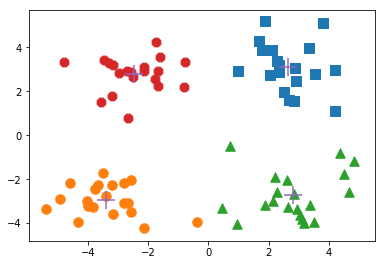

In [17]:
pltDraw(dataMat)

### 二分 K-均值算法

In [18]:
#bisecting k-means clustering algorithm
def biKmeans(dataSet, k, distMeas = distEclud):
	m = shape(dataSet)[0]
	clusterAssment = mat(zeros((m,2)))#store squared error for each point in the dataset
	centroid0 = mean(dataSet,axis = 0).tolist()[0]#centroid for the entire dataset
	centList = [centroid0]#the list to save all the centroids above
	#calculate the error bw that point and the centroid, go over all the points in the dataset
	for j in range(m):
		clusterAssment[j,1] = distMeas(mat(centroid0),dataSet[j,:]) ** 2
	#split the clusters until find the desired number of the clusters
	while (len(centList) < k):
		lowestSSE = inf #initialization
		for i in range(len(centList)):
			#ptsInCurrCluster:get the points in current cluster i
			ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A == i)[0],:]
			centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)#get the centroids and the squared errors
			sseSplit = sum(splitClustAss[:,1])# sum of errors
			sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A != i)[0],1])
			print("sseSplit, and notSplit:",sseSplit, sseNotSplit)
			if(sseSplit + sseNotSplit) < lowestSSE:
				bestCentToSplit = i
				bestNewCents = centroidMat
				bestClustAss = splitClustAss.copy()
				lowestSSE = sseSplit + sseNotSplit
		#update the cluster assignments
		bestClustAss[nonzero(bestClustAss[:,0].A == 1)[0],0] = len(centList)
		bestClustAss[nonzero(bestClustAss[:,1].A == 0)[0],0] = bestCentToSplit
		print("the bestCentToSplit is: ", bestCentToSplit)
		print("the len of bestClustAss is: ",len(bestClustAss))
		centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]
		centList.append(bestNewCents[1,:].tolist()[0])
		clusterAssment[nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:] = bestClustAss
	return mat(centList), clusterAssment



In [19]:
dataMat3 = mat(loadDataSet('E:\\python\\machinelearning\\MLDownloads\\machinelearninginaction\\Ch10\\testSet2.txt'))

In [20]:
dataMat3

matrix([[ 3.275154,  2.957587],
        [-3.344465,  2.603513],
        [ 0.355083, -3.376585],
        [ 1.852435,  3.547351],
        [-2.078973,  2.552013],
        [-0.993756, -0.884433],
        [ 2.682252,  4.007573],
        [-3.087776,  2.878713],
        [-1.565978, -1.256985],
        [ 2.441611,  0.444826],
        [-0.659487,  3.111284],
        [-0.459601, -2.618005],
        [ 2.17768 ,  2.387793],
        [-2.920969,  2.917485],
        [-0.028814, -4.168078],
        [ 3.625746,  2.119041],
        [-3.912363,  1.325108],
        [-0.551694, -2.814223],
        [ 2.855808,  3.483301],
        [-3.594448,  2.856651],
        [ 0.421993, -2.372646],
        [ 1.650821,  3.407572],
        [-2.082902,  3.384412],
        [-0.718809, -2.492514],
        [ 4.513623,  3.841029],
        [-4.822011,  4.607049],
        [-0.656297, -1.449872],
        [ 1.919901,  4.439368],
        [-3.287749,  3.918836],
        [-1.576936, -2.977622],
        [ 3.598143,  1.97597 ],
        

In [21]:
centList,myNewAssments = biKmeans(dataMat3,3)

centroids: [[3.07746098 2.19869805]
 [0.16510569 3.50343313]]
centroids: [[ 1.9349073   0.23298474]
 [-1.86987461  2.03724906]]
centroids: [[ 1.547666    0.38343292]
 [-2.71580587  2.48817592]]
centroids: [[ 1.23710375  0.17480612]
 [-2.94737575  3.3263781 ]]
sseSplit, and notSplit: 570.7227574246755 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  60
centroids: [[1.49048279 0.83960311]
 [1.21100434 4.54434066]]
centroids: [[ 0.37575954 -1.69015508]
 [ 2.836743    3.6383055 ]]
centroids: [[-0.32150057 -2.62473743]
 [ 2.95977168  3.26903847]]
centroids: [[-0.45965615 -2.7782156 ]
 [ 2.93386365  3.12782785]]
sseSplit, and notSplit: 68.68654812621844 38.06295063565756
centroids: [[-4.37191475  2.47170449]
 [-1.72943997  4.69753219]]
centroids: [[-3.6432129  3.0326035]
 [-2.2515386  3.6201527]]
centroids: [[-3.64143392  3.26215025]
 [-1.9062885   3.42271988]]
centroids: [[-3.58362738  3.28784469]
 [-1.76576557  3.39794014]]
sseSplit, and notSplit: 22.971771896318412 532.65980678

centroids: [[ 0.48327368 -1.44987856]
 [ 1.93322915  2.11243781]]
centroids: [[-0.74459109 -2.39373345]
 [ 0.18204313  3.32057745]]
centroids: [[-0.45965615 -2.7782156 ]
 [-0.00675605  3.22710297]]
sseSplit, and notSplit: 453.0334895807502 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  60
centroids: [[-0.11936532 -2.66482548]
 [-1.2998874  -3.70006036]]
centroids: [[-0.15208043 -2.61359014]
 [-1.17733283 -3.16234167]]
centroids: [[ 0.0335725  -2.7077875 ]
 [-1.19949912 -2.88385775]]
centroids: [[ 0.18969282 -3.025871  ]
 [-1.25330489 -2.47552567]]
centroids: [[ 0.19848727 -3.24320436]
 [-1.26405367 -2.209896  ]]
centroids: [[ 0.2642961 -3.3057243]
 [-1.1836084 -2.2507069]]
centroids: [[ 0.35496167 -3.36033556]
 [-1.12616164 -2.30193564]]
sseSplit, and notSplit: 12.753263136887313 423.8762401366249
centroids: [[-1.95286322  1.58813537]
 [ 1.93934666  3.86057815]]
centroids: [[-2.94737575  3.3263781 ]
 [ 2.93386365  3.12782785]]
sseSplit, and notSplit: 77.59224931775066 29.1

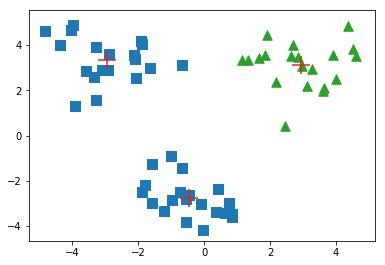

In [22]:
pltDraw(dataMat3,alg=biKmeans,numClust=3)

### 示例：对地图上的点进行聚类

In [23]:
import urllib.request
import json
#get a dict from yahoo
def geoGrab(stAddress, city):
	apiStem = 'http://where.yahooapis.com/geocode?'
	params = {}#dict to save data
	params['flags'] = 'J'#JSON format
	params['appid'] = 'aaa0VN6k'
	params['location'] = '%s %s ' % (stAddress, city)
	url_params = urllib.parse.urlencode(params)#convert params dict to string which can pass on in a URL
	yahooApi = apiStem + url_params
	print("yahooApi: ",yahooApi)#print
	c = urllib.request.urlopen(yahooApi)#open URL and read the returned value
	return json.loads(c.read())#convert JSON format to a dict

from time import sleep
def massPlaceFind(filename):
	fw = open('E:\\python\\machinelearning\\MLDownloads\\machinelearninginaction\\Ch10\\places.txt')
	for line in open(filename).readlines():
		line = line.strip()
		lineArr = line.split('\t')#tab-delimited text file
		retDict = geoGrab(lineArr[1],lineArr[2])#fed data of col1 and col2 to geoGrab()
		if retDict['ResultSet']['Error'] == 0:#check error
			lat = float(retDict['ResultSet']['Results'][0]['latitude'])
			lng = float(retDict['ResultSet']['Results'][0]['longitude'])
			print("%s\t%f\t%f" % (lineArr[0], lat, lng))
			fw.write('%s\t%f\t%f\n' % (line,lat,lng))
		else:
			print("error fetching")
		sleep(1)#delay one second
	fw.close()

In [24]:
#geoResults = geoGrab('1 VA Center', 'Augusta, ME') 

In [25]:
#massPlaceFind('E:\\python\\machinelearning\\MLDownloads\\machinelearninginaction\\Ch10\\portlandClubs.txt')

In [26]:
def distSLC(vecA, vecB):#spherical law of cosines,pi is from numpy
	a = sin(vecA[0,1] * pi / 180) * sin(vecB[0,1] * pi / 180)
	b = cos(vecA[0,1] * pi / 180) * cos(vecB[0,1] * pi / 180) * cos(pi * (vecB[0,0] - vecA[0,0]) / 180)
	return arccos(a + b) * 6371.0


In [27]:
def clusterClubs(numClust=5):
	datList = []
	for line in open('E:\\python\\machinelearning\\MLDownloads\\machinelearninginaction\\Ch10\\places.txt').readlines():
		lineArr = line.split('\t')
		datList.append([float(lineArr[4]), float(lineArr[3])])
	datMat = mat(datList)
	myCentroids, clustAssing = biKmeans(datMat, numClust, distMeas=distSLC)
	fig = plt.figure()
	rect=[0.1,0.1,0.8,0.8]
	scatterMarkers=['s', 'o', '^', '8', 'p', 'd', 'v', 'h', '>', '<']
	axprops = dict(xticks=[], yticks=[])
	ax0=fig.add_axes(rect, label='ax0', **axprops)
	imgP = plt.imread('E:\\python\\machinelearning\\MLDownloads\\machinelearninginaction\\Ch10\\Portland.png')
	ax0.imshow(imgP)
	ax1=fig.add_axes(rect, label='ax1', frameon=False)
	for i in range(numClust):
		ptsInCurrCluster = datMat[nonzero(clustAssing[:,0].A==i)[0],:]
		markerStyle = scatterMarkers[i % len(scatterMarkers)]
		ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0],ptsInCurrCluster[:,1].flatten().A[0],marker=markerStyle, s=90)
	ax1.scatter(myCentroids[:,0].flatten().A[0],myCentroids[:,1].flatten().A[0], marker='+', s=300)
	plt.show()

In [29]:
clusterClubs(5)

centroids: [[-122.63971092   45.49447346]
 [-122.44806737   45.42369948]]
centroids: [[-122.64309672   45.51365588]
 [-122.44609275   45.4903825 ]]
centroids: [[-122.65934242   45.51461818]
 [-122.50026167   45.50132717]]
centroids: [[-122.67080008   45.51476275]
 [-122.52082522   45.50534789]]
centroids: [[-122.6827712    45.51158464]
 [-122.53587308   45.51366054]]
centroids: [[-122.69340632   45.5070501 ]
 [-122.54653121   45.51955717]]
centroids: [[-122.69551477   45.50729503]
 [-122.54868607   45.51882187]]
sseSplit, and notSplit: 3043.2633161055337 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  69
centroids: [[-122.75362272   45.63864786]
 [-122.72823754   45.53612237]]
centroids: [[-122.76690133   45.612314  ]
 [-122.68956589   45.49854344]]
centroids: [[-122.72070683   45.59796783]
 [-122.69093439   45.49080906]]
centroids: [[-122.72072414   45.59011757]
 [-122.69000022   45.48917759]]
sseSplit, and notSplit: 1435.437848696069 851.4388885817106
centroids: [[-122.43

ValueError: min() arg is an empty sequence